## 1. Import Library

In [149]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from sklearn.cluster import KMeans

In [151]:
data = pd.read_excel('keluarga14-1.xlsx')
data.head()

,No,Kecamatan,DesaKelurahan,Alamat,KepalaKeluarga,PadanDukcapil,JenisKelamin,TanggalLahir,Pekerjaan,Pendidikan,...,PenerimaSEMBAKO,risiko_stunting,rtlh,percentile,Pendapatan,FrekuensiMakanPerHari,FrekuensiBeliPakaianBaru,FrekuensiMakanDagingSusuAyam,LuasLantai,BisaBerobatKePuskesmas
0,147655,SAMPUNG,CARANGREJO,DUSUN KALANGAN RT02 RW02,ABDUL MANAN,Tidak,Laki-laki,3/20/1978 12:00:00 AM,Pekerja Lepas,Tamat SD/sederajat,...,Tidak,Berisiko,Layak Huni,1,350000,2,0,1,7,False
1,179934,PONOROGO,PAJU,JL SASTROREJO,TRIMO,Tidak,Laki-laki,6/30/1958 12:00:00 AM,Pekerja Lepas,Tidak tamat SD/sederajat,...,Tidak,Berisiko,Layak Huni,1,400000,1,1,0,6,False
2,204103,NGEBEL,TALUN,DUKUH SEDAYU RT:01RW:02,RAMELAN,Ya,Laki-laki,3/14/1941 12:00:00 AM,Petani,Tidak/belum sekolah,...,Ya,Tidak berisiko,Tidak Layak Huni,1,300000,2,0,2,5,False
3,204110,NGEBEL,TALUN,DUKUH SEDAYU RT01 RW01,BIBIT,Ya,Laki-laki,4/7/1946 12:00:00 AM,Tidak/belum bekerja,Tidak/belum sekolah,...,Ya,Tidak berisiko,Tidak Layak Huni,1,250000,1,0,1,6,False
4,30343,NGRAYUN,GEDANGAN,GANDUSARI RT 02 RW 11,KATIJO,Ya,Laki-laki,2/6/1971 12:00:00 AM,Petani,Tamat SD/sederajat,...,Ya,Berisiko,Layak Huni,1,300000,2,0,1,8,True


In [153]:
#menampilkan nama kolom
print('Nama Kolom Dalam Dataset:')
for col in data.columns:
    print(col)

Nama Kolom Dalam Dataset:
No
Kecamatan
DesaKelurahan
Alamat
KepalaKeluarga
PadanDukcapil
JenisKelamin
TanggalLahir
Pekerjaan
Pendidikan
KepemilikanRumah
MemilikiSimpanan
JenisAtap
JenisDinding
JenisLantai
SumberPenerangan
BahanBakarMemasak
SumberAirMinum
MemilikifasilitasBuangAirBesar
PenerimaBPNT
PenerimaBPUM
PenerimaBST
PenerimaPKH
PenerimaSEMBAKO
risiko_stunting
rtlh
percentile
Pendapatan
FrekuensiMakanPerHari
FrekuensiBeliPakaianBaru
FrekuensiMakanDagingSusuAyam
LuasLantai
BisaBerobatKePuskesmas


In [155]:
#menampilkan jumlah kolom dan baris
num_rows, num_cols = data.shape

print(f'Jumlah Baris: {num_rows}')
print(f'Jumlah Kolom: {num_cols}')

Jumlah Baris: 223206
Jumlah Kolom: 33


In [157]:
#menampilkan info dataset
print('Tipe Data Setiap Kolom:')
data.info()

Tipe Data Setiap Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223206 entries, 0 to 223205
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   No                              223206 non-null  int64 
 1   Kecamatan                       223206 non-null  object
 2   DesaKelurahan                   223206 non-null  object
 3   Alamat                          223162 non-null  object
 4   KepalaKeluarga                  223206 non-null  object
 5   PadanDukcapil                   223206 non-null  object
 6   JenisKelamin                    223206 non-null  object
 7   TanggalLahir                    223206 non-null  object
 8   Pekerjaan                       223206 non-null  object
 9   Pendidikan                      223206 non-null  object
 10  KepemilikanRumah                223206 non-null  object
 11  MemilikiSimpanan                223206 non-null  object
 12  JenisA

In [160]:
# Daftar kolom yang ingin dihapus
dihapus = ['Alamat','PadanDukcapil','No','percentile']
data = data.drop(columns=dihapus)
data.head()

,Kecamatan,DesaKelurahan,KepalaKeluarga,JenisKelamin,TanggalLahir,Pekerjaan,Pendidikan,KepemilikanRumah,MemilikiSimpanan,JenisAtap,...,PenerimaPKH,PenerimaSEMBAKO,risiko_stunting,rtlh,Pendapatan,FrekuensiMakanPerHari,FrekuensiBeliPakaianBaru,FrekuensiMakanDagingSusuAyam,LuasLantai,BisaBerobatKePuskesmas
0,SAMPUNG,CARANGREJO,ABDUL MANAN,Laki-laki,3/20/1978 12:00:00 AM,Pekerja Lepas,Tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Tidak,Berisiko,Layak Huni,350000,2,0,1,7,False
1,PONOROGO,PAJU,TRIMO,Laki-laki,6/30/1958 12:00:00 AM,Pekerja Lepas,Tidak tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Tidak,Berisiko,Layak Huni,400000,1,1,0,6,False
2,NGEBEL,TALUN,RAMELAN,Laki-laki,3/14/1941 12:00:00 AM,Petani,Tidak/belum sekolah,Milik Sendiri,Tidak,Genteng,...,Ya,Ya,Tidak berisiko,Tidak Layak Huni,300000,2,0,2,5,False
3,NGEBEL,TALUN,BIBIT,Laki-laki,4/7/1946 12:00:00 AM,Tidak/belum bekerja,Tidak/belum sekolah,Milik Sendiri,Tidak,Genteng,...,Tidak,Ya,Tidak berisiko,Tidak Layak Huni,250000,1,0,1,6,False
4,NGRAYUN,GEDANGAN,KATIJO,Laki-laki,2/6/1971 12:00:00 AM,Petani,Tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Ya,Berisiko,Layak Huni,300000,2,0,1,8,True


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223206 entries, 0 to 223205
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Kecamatan                       223206 non-null  object
 1   DesaKelurahan                   223206 non-null  object
 2   KepalaKeluarga                  223206 non-null  object
 3   JenisKelamin                    223206 non-null  object
 4   TanggalLahir                    223206 non-null  object
 5   Pekerjaan                       223206 non-null  object
 6   Pendidikan                      223206 non-null  object
 7   KepemilikanRumah                223206 non-null  object
 8   MemilikiSimpanan                223206 non-null  object
 9   JenisAtap                       223206 non-null  object
 10  JenisDinding                    223206 non-null  object
 11  JenisLantai                     223206 non-null  object
 12  SumberPenerangan              

In [162]:
#deteksi missing value disetiap kolom
nan = data.isna().sum()

print('Jumlah Missing Value Setiap Kolom:')
nan

Jumlah Missing Value Setiap Kolom:


Kecamatan                         0
DesaKelurahan                     0
KepalaKeluarga                    0
JenisKelamin                      0
TanggalLahir                      0
Pekerjaan                         0
Pendidikan                        0
KepemilikanRumah                  0
MemilikiSimpanan                  0
JenisAtap                         0
JenisDinding                      0
JenisLantai                       0
SumberPenerangan                  0
BahanBakarMemasak                 0
SumberAirMinum                    0
MemilikifasilitasBuangAirBesar    0
PenerimaBPNT                      0
PenerimaBPUM                      0
PenerimaBST                       0
PenerimaPKH                       0
PenerimaSEMBAKO                   0
risiko_stunting                   3
rtlh                              3
Pendapatan                        0
FrekuensiMakanPerHari             0
FrekuensiBeliPakaianBaru          0
FrekuensiMakanDagingSusuAyam      0
LuasLantai                  

In [163]:
# Contoh: Menampilkan semua baris yang punya setidaknya satu missing value
df_missing = data[data.isnull().any(axis=1)]

print("Baris yang mengandung missing value:")
df_missing

Baris yang mengandung missing value:


,Kecamatan,DesaKelurahan,KepalaKeluarga,JenisKelamin,TanggalLahir,Pekerjaan,Pendidikan,KepemilikanRumah,MemilikiSimpanan,JenisAtap,...,PenerimaPKH,PenerimaSEMBAKO,risiko_stunting,rtlh,Pendapatan,FrekuensiMakanPerHari,FrekuensiBeliPakaianBaru,FrekuensiMakanDagingSusuAyam,LuasLantai,BisaBerobatKePuskesmas
34010,SAMPUNG,GLINGGANG,JIMAN,Laki-laki,6/30/1975 12:00:00 AM,Wiraswasta,Tamat SD/sederajat,Milik Sendiri,Ya,Genteng,...,Ya,Ya,NaN,NaN,600000,1,0,1,7,False
42036,JAMBON,POKO,GIMAH,Perempuan,6/13/1951 12:00:00 AM,Petani,Tidak tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Tidak,NaN,NaN,450000,2,0,2,6,True
76367,PONOROGO,PURBOSUMAN,SUMINI AL SURIP,Perempuan,6/30/1955 12:00:00 AM,Tidak/belum bekerja,Tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Ya,NaN,NaN,800000,3,2,1,11,True


In [164]:
data['risiko_stunting'] = data['risiko_stunting'].fillna('Tidak berisiko')

In [165]:
# Contoh: Menampilkan semua baris yang punya setidaknya satu missing value
df_missing = data[data.isnull().any(axis=1)]

print("Baris yang mengandung missing value:")
df_missing

Baris yang mengandung missing value:


,Kecamatan,DesaKelurahan,KepalaKeluarga,JenisKelamin,TanggalLahir,Pekerjaan,Pendidikan,KepemilikanRumah,MemilikiSimpanan,JenisAtap,...,PenerimaPKH,PenerimaSEMBAKO,risiko_stunting,rtlh,Pendapatan,FrekuensiMakanPerHari,FrekuensiBeliPakaianBaru,FrekuensiMakanDagingSusuAyam,LuasLantai,BisaBerobatKePuskesmas
34010,SAMPUNG,GLINGGANG,JIMAN,Laki-laki,6/30/1975 12:00:00 AM,Wiraswasta,Tamat SD/sederajat,Milik Sendiri,Ya,Genteng,...,Ya,Ya,Tidak berisiko,NaN,600000,1,0,1,7,False
42036,JAMBON,POKO,GIMAH,Perempuan,6/13/1951 12:00:00 AM,Petani,Tidak tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Tidak,Tidak berisiko,NaN,450000,2,0,2,6,True
76367,PONOROGO,PURBOSUMAN,SUMINI AL SURIP,Perempuan,6/30/1955 12:00:00 AM,Tidak/belum bekerja,Tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Ya,Tidak berisiko,NaN,800000,3,2,1,11,True


In [166]:
data['rtlh'] = data['rtlh'].fillna('Layak Huni')

In [168]:
#cek missing value setelah imputasi
nan = data.isna().sum()

print('Jumlah Missing Value Setiap Kolom Setelah Imputasi:')
nan

Jumlah Missing Value Setiap Kolom Setelah Imputasi:


Kecamatan                         0
DesaKelurahan                     0
KepalaKeluarga                    0
JenisKelamin                      0
TanggalLahir                      0
Pekerjaan                         0
Pendidikan                        0
KepemilikanRumah                  0
MemilikiSimpanan                  0
JenisAtap                         0
JenisDinding                      0
JenisLantai                       0
SumberPenerangan                  0
BahanBakarMemasak                 0
SumberAirMinum                    0
MemilikifasilitasBuangAirBesar    0
PenerimaBPNT                      0
PenerimaBPUM                      0
PenerimaBST                       0
PenerimaPKH                       0
PenerimaSEMBAKO                   0
risiko_stunting                   0
rtlh                              0
Pendapatan                        0
FrekuensiMakanPerHari             0
FrekuensiBeliPakaianBaru          0
FrekuensiMakanDagingSusuAyam      0
LuasLantai                  

In [169]:
# Gabungkan beberapa rentang dengan index
data1 = pd.concat([
    data.loc[0:4999],  
    data.loc[28359:33358],  
    data.loc[59519:64518],
    data.loc[90662:95661]
])
data1

,Kecamatan,DesaKelurahan,KepalaKeluarga,JenisKelamin,TanggalLahir,Pekerjaan,Pendidikan,KepemilikanRumah,MemilikiSimpanan,JenisAtap,...,PenerimaPKH,PenerimaSEMBAKO,risiko_stunting,rtlh,Pendapatan,FrekuensiMakanPerHari,FrekuensiBeliPakaianBaru,FrekuensiMakanDagingSusuAyam,LuasLantai,BisaBerobatKePuskesmas
0,SAMPUNG,CARANGREJO,ABDUL MANAN,Laki-laki,3/20/1978 12:00:00 AM,Pekerja Lepas,Tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Tidak,Berisiko,Layak Huni,350000,2,0,1,7,False
1,PONOROGO,PAJU,TRIMO,Laki-laki,6/30/1958 12:00:00 AM,Pekerja Lepas,Tidak tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Tidak,Berisiko,Layak Huni,400000,1,1,0,6,False
2,NGEBEL,TALUN,RAMELAN,Laki-laki,3/14/1941 12:00:00 AM,Petani,Tidak/belum sekolah,Milik Sendiri,Tidak,Genteng,...,Ya,Ya,Tidak berisiko,Tidak Layak Huni,300000,2,0,2,5,False
3,NGEBEL,TALUN,BIBIT,Laki-laki,4/7/1946 12:00:00 AM,Tidak/belum bekerja,Tidak/belum sekolah,Milik Sendiri,Tidak,Genteng,...,Tidak,Ya,Tidak berisiko,Tidak Layak Huni,250000,1,0,1,6,False
4,NGRAYUN,GEDANGAN,KATIJO,Laki-laki,2/6/1971 12:00:00 AM,Petani,Tamat SD/sederajat,Milik Sendiri,Tidak,Genteng,...,Tidak,Ya,Berisiko,Layak Huni,300000,2,0,1,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,SUKOREJO,PRAJEGAN,TUMIRIN,Laki-laki,8/2/1975 12:00:00 AM,Petani,Tamat SD/sederajat,Milik Sendiri,Ya,Genteng,...,Ya,Ya,Bukan sasaran,Layak Huni,1200000,3,2,3,13,True
95658,JENANGAN,SRATEN,NALIM,Laki-laki,6/30/1955 12:00:00 AM,Wiraswasta,Tamat SMP/sederajat,Milik Sendiri,Ya,Genteng,...,Tidak,Ya,Tidak berisiko,Layak Huni,900000,3,3,1,14,True
95659,SAMBIT,BESUKI,SANIRAN,Laki-laki,3/4/1952 12:00:00 AM,Petani,Tamat SD/sederajat,Milik Sendiri,Ya,Genteng,...,Tidak,Tidak,Tidak berisiko,Layak Huni,900000,3,2,1,12,True
95660,KAUMAN,SOMOROTO,SOEKAR,Laki-laki,6/30/1956 12:00:00 AM,Petani,Siswa SD/sederajat,Milik Sendiri,Ya,Genteng,...,Tidak,Ya,Tidak berisiko,Layak Huni,900000,3,3,2,13,True


In [170]:
kolom_terpilih = ["KepalaKeluarga",
                  "Kecamatan",
                  "DesaKelurahan",
                  "FrekuensiMakanPerHari",
                  "BisaBerobatKePuskesmas",
                  "Pendapatan",
                  "SumberPenerangan",
                  "BahanBakarMemasak",
                  "MemilikifasilitasBuangAirBesar",
                  "FrekuensiMakanDagingSusuAyam",
                  "LuasLantai",
                  "JenisDinding",
                  "SumberAirMinum",
                  "MemilikiSimpanan",
                  "JenisLantai",
                  "FrekuensiBeliPakaianBaru",
                  "Pendidikan"]

data2 = data1[kolom_terpilih]
data2.head()

,KepalaKeluarga,Kecamatan,DesaKelurahan,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan
0,ABDUL MANAN,SAMPUNG,CARANGREJO,2,False,350000,Listrik Pribadi s/d 900 Watt,Arang/Kayu,"Ya, dengan Septic Tank",1,7,Tembok,Sumur Bor,Tidak,Semen,0,Tamat SD/sederajat
1,TRIMO,PONOROGO,PAJU,1,False,400000,Listrik Pribadi s/d 900 Watt,Arang/Kayu,"Ya, dengan Septic Tank",0,6,Tembok,Sumur Bor,Tidak,Tanah,1,Tidak tamat SD/sederajat
2,RAMELAN,NGEBEL,TALUN,2,False,300000,Listrik Pribadi > 900 Watt,Arang/Kayu,"Ya, dengan Septic Tank",2,5,Kayu/Papan,Sumur Terlindung,Tidak,Tanah,0,Tidak/belum sekolah
3,BIBIT,NGEBEL,TALUN,1,False,250000,Listrik Pribadi > 900 Watt,Arang/Kayu,"Ya, dengan Septic Tank",1,6,Kayu/Papan,Sumur Terlindung,Tidak,Tanah,0,Tidak/belum sekolah
4,KATIJO,NGRAYUN,GEDANGAN,2,True,300000,Listrik Pribadi s/d 900 Watt,Arang/Kayu,"Ya, dengan Septic Tank",1,8,Tembok,"Air Permukaan (Sungai, Danau, dll)",Tidak,Semen,0,Tamat SD/sederajat


In [171]:
data2.to_excel('data_bersih.xlsx', index=False, engine='openpyxl')
print("Data berhasil disimpan ke")

Data berhasil disimpan ke


In [222]:
data3= data2.copy()

In [224]:
# Pendidikan
data3['Pendidikan'] = data3['Pendidikan'].map({
    'Tidak/belum sekolah': 5,
    'Tidak tamat SD/sederajat': 5,
    'Siswa SD/sederajat': 4,
    'Tamat SD/sederajat': 4,
    'Siswa SMP/sederajat': 3,
    'Tamat SMP/sederajat': 3,
    'Siswa SMA/sederajat': 2,
    'Tamat SMA/sederajat': 2,
    'Mahasiswa Perguruan Tinggi': 1,
    'Tamat Perguruan Tinggi': 1
})

# Jenis Dinding
data3['JenisDinding'] = data3['JenisDinding'].map({
    'Tembok': 1,
    'Seng': 2,
    'Lainnya': 2,
    'Kayu/Papan': 3,
    'Bambu': 4
})

# Jenis Lantai
data3['JenisLantai'] = data3['JenisLantai'].map({
    'Keramik/Granit/Marmer/Ubin/Tegel/Teraso': 1,
    'Semen': 2,
    'Lainnya': 3,
    'Kayu/Papan': 3,
    'Bambu': 4,
    'Tanah': 5
})

# Sumber Penerangan
data3['SumberPenerangan'] = data3['SumberPenerangan'].map({
    'Listrik Pribadi s/d 900 Watt': 1,
    'Listrik Pribadi > 900 Watt': 1,
    'Non-Listrik': 2,
    'Listrik Bersama': 2,
    'Genset/solar cell': 2
})

# Bahan Bakar Memasak
data3['BahanBakarMemasak'] = data3['BahanBakarMemasak'].map({
    'Listrik/Gas': 1,
    'Minyak Tanah': 2,
    'Arang/Kayu': 3,
    'Lainnya': 2
})

# Sumber Air Minum
data3['SumberAirMinum'] = data3['SumberAirMinum'].map({
    'Ledeng/PAM': 1,
    'Air Kemasan/Isi Ulang': 1,
    'Sumur Bor': 1,
    'Sumur Terlindung': 1,
    'Sumur Tidak Terlindung': 2,
    'Air Permukaan (Sungai, Danau, dll)': 3,
    'Air Hujan': 4,
    'Lainnya': 3
})

# Fasilitas BAB
data3['MemilikifasilitasBuangAirBesar'] = data3['MemilikifasilitasBuangAirBesar'].map({
    'Ya, dengan Septic Tank': 1,
    'Ya, tanpa Septic Tank': 2,
    'Lainnya': 2,
    'Tidak, Jamban Umum/Bersama': 3
})

# Simpanan
data3['MemilikiSimpanan'] = data3['MemilikiSimpanan'].map({
    'Ya': 1,
    'Tidak': 2})

# Bisa berobat ke puskesmas
data3['BisaBerobatKePuskesmas'] = data3['BisaBerobatKePuskesmas'].map({
    True: 1,
    False: 2})

# Pendapatan
data3['Pendapatan'] = data['Pendapatan'].apply(lambda x: 2 if x <= 600_000 else 1)

# Luas Lantai
data3['LuasLantai'] = data['LuasLantai'].apply(lambda x: 2 if x <= 8 else 1)

# Baju
data3['FrekuensiBeliPakaianBaru'] = data['FrekuensiBeliPakaianBaru'].apply(lambda x: 2 if x <=1 else 1)

data3['FrekuensiMakanDagingSusuAyam'] = data['FrekuensiMakanDagingSusuAyam'].apply(lambda x: 2 if x <=1 else 1)

In [226]:
data3.head()

,KepalaKeluarga,Kecamatan,DesaKelurahan,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan
0,ABDUL MANAN,SAMPUNG,CARANGREJO,2,2,2,1,3,1,2,2,1,1,2,2,2,4
1,TRIMO,PONOROGO,PAJU,1,2,2,1,3,1,2,2,1,1,2,5,2,5
2,RAMELAN,NGEBEL,TALUN,2,2,2,1,3,1,1,2,3,1,2,5,2,5
3,BIBIT,NGEBEL,TALUN,1,2,2,1,3,1,2,2,3,1,2,5,2,5
4,KATIJO,NGRAYUN,GEDANGAN,2,1,2,1,3,1,2,2,1,3,2,2,2,4


In [228]:
data3.to_excel('data_proses1.xlsx', index=False, engine='openpyxl')
print("Data berhasil disimpan")

Data berhasil disimpan


In [229]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   KepalaKeluarga                  20000 non-null  object
 1   Kecamatan                       20000 non-null  object
 2   DesaKelurahan                   20000 non-null  object
 3   FrekuensiMakanPerHari           20000 non-null  int64 
 4   BisaBerobatKePuskesmas          20000 non-null  int64 
 5   Pendapatan                      20000 non-null  int64 
 6   SumberPenerangan                20000 non-null  int64 
 7   BahanBakarMemasak               20000 non-null  int64 
 8   MemilikifasilitasBuangAirBesar  20000 non-null  int64 
 9   FrekuensiMakanDagingSusuAyam    20000 non-null  int64 
 10  LuasLantai                      20000 non-null  int64 
 11  JenisDinding                    20000 non-null  int64 
 12  SumberAirMinum                  20000 non-null  int

# SAW - AHP

C1 : makan dalam sehari
C2 : pengobatan ke puskesmas
C3 : pendapatan
C4 : sumber penerangan
C5 : bahan bakar memasak
C6 : fasilitas buang air 
C7 : makan daging
C8 : luas lantai
C9 : jenis dinding
C10 : sumber air minum
C11 : tabungan/simpanan
C12 : jenis lantai
C13 : membeli pakaian
C14 : pendidikan kepala RT

In [235]:
# Langkah 1: Masukkan matriks perbandingan 14x14
# Contoh dummy (Anda HARUS ganti dengan nilai aktual dari perbandingan berpasangan)
pairwise_matrix = np.array([
    [1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 7, 7, 7],
    [1/2, 1, 2, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5],
    [1/2, 1/2, 1, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5],
    [1/3, 1/3, 1/3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 5, 5],
    [1/3, 1/3, 1/3, 1/2, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4],
    [1/3, 1/3, 1/3, 1/2, 1/2, 1, 2, 3, 3, 3, 3, 3, 4, 4],
    [1/4, 1/3, 1/3, 1/3, 1/2, 1/2, 1, 3, 3, 3, 3, 3, 3, 3],
    [1/5, 1/3, 1/3, 1/3, 1/2, 1/3, 1/3, 1, 2, 2, 3, 3, 3, 3],
    [1/5, 1/3, 1/4, 1/3, 1/3, 1/3, 1/3, 1/2, 1, 2, 2, 3, 3, 3],
    [1/5, 1/4, 1/4, 1/3, 1/3, 1/3, 1/3, 1/2, 1/2, 1, 2, 2, 3, 3],
    [1/5, 1/5, 1/4, 1/3, 1/3, 1/3, 1/3, 1/3, 1/2, 1/2, 1, 2, 2, 2],
    [1/7, 1/5, 1/5, 1/3, 1/3, 1/3, 1/3, 1/3, 1/3, 1/2, 1/2, 1, 2, 2],
    [1/7, 1/5, 1/5, 1/5, 1/4, 1/4, 1/3, 1/3, 1/3, 1/3, 1/2, 1/2, 1, 2],
    [1/7, 1/5, 1/5, 1/5, 1/4, 1/4, 1/3, 1/3, 1/3, 1/3, 1/2, 1/2, 1/2, 1]
])

# Langkah 2: Normalisasi matriks
col_sums = pairwise_matrix.sum(axis=0)
normalized_matrix = pairwise_matrix / col_sums

# Langkah 3: Hitung bobot (mean dari setiap baris)
ahp_weights = normalized_matrix.mean(axis=1)

# Output bobot
for i, weight in enumerate(ahp_weights):
    print(f"Kriteria {i+1}: Bobot AHP = {weight:.4f}")

# Total bobot (harus mendekati 1.0)
print(f"\nJumlah total bobot: {ahp_weights.sum():.4f}")


Kriteria 1: Bobot AHP = 0.1924
Kriteria 2: Bobot AHP = 0.1478
Kriteria 3: Bobot AHP = 0.1339
Kriteria 4: Bobot AHP = 0.0979
Kriteria 5: Bobot AHP = 0.0773
Kriteria 6: Bobot AHP = 0.0737
Kriteria 7: Bobot AHP = 0.0630
Kriteria 8: Bobot AHP = 0.0488
Kriteria 9: Bobot AHP = 0.0414
Kriteria 10: Bobot AHP = 0.0353
Kriteria 11: Bobot AHP = 0.0282
Kriteria 12: Bobot AHP = 0.0236
Kriteria 13: Bobot AHP = 0.0195
Kriteria 14: Bobot AHP = 0.0173

Jumlah total bobot: 1.0000


In [237]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   KepalaKeluarga                  20000 non-null  object
 1   Kecamatan                       20000 non-null  object
 2   DesaKelurahan                   20000 non-null  object
 3   FrekuensiMakanPerHari           20000 non-null  int64 
 4   BisaBerobatKePuskesmas          20000 non-null  int64 
 5   Pendapatan                      20000 non-null  int64 
 6   SumberPenerangan                20000 non-null  int64 
 7   BahanBakarMemasak               20000 non-null  int64 
 8   MemilikifasilitasBuangAirBesar  20000 non-null  int64 
 9   FrekuensiMakanDagingSusuAyam    20000 non-null  int64 
 10  LuasLantai                      20000 non-null  int64 
 11  JenisDinding                    20000 non-null  int64 
 12  SumberAirMinum                  20000 non-null  int

In [239]:
# Ambil semua fitur mulai kolom ke-4
X = data3.iloc[:, 3:].copy()

# Bobot AHP
ahp_weights = [
    0.1924, 0.1478, 0.1339, 0.0979, 0.0773, 0.0737, 0.0630, 0.0488, 
    0.0414, 0.0353, 0.0282, 0.0236, 0.0195, 0.0173
]

# Semua variabel dianggap sebagai cost
X_norm = X.astype(float)

# Normalisasi cost: min / x_ij (semakin kecil nilai → skor normalisasi semakin besar → semakin baik)
for col in X_norm.columns:
    X_norm[col] = X_norm[col].min() / X_norm[col]

# Hitung skor SAW
X_weighted = X_norm * ahp_weights
data3['SAW_Score'] = X_weighted.sum(axis=1)

In [241]:
X_norm

,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan
0,0.500000,0.5,0.5,1.0,0.333333,1.0,0.5,0.5,1.000000,1.000000,0.5,0.5,0.5,0.250000
1,1.000000,0.5,0.5,1.0,0.333333,1.0,0.5,0.5,1.000000,1.000000,0.5,0.2,0.5,0.200000
2,0.500000,0.5,0.5,1.0,0.333333,1.0,1.0,0.5,0.333333,1.000000,0.5,0.2,0.5,0.200000
3,1.000000,0.5,0.5,1.0,0.333333,1.0,0.5,0.5,0.333333,1.000000,0.5,0.2,0.5,0.200000
4,0.500000,1.0,0.5,1.0,0.333333,1.0,0.5,0.5,1.000000,0.333333,0.5,0.5,0.5,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.333333,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,0.250000
95658,0.333333,1.0,1.0,1.0,1.000000,1.0,0.5,1.0,1.000000,1.000000,1.0,0.5,1.0,0.333333
95659,0.333333,1.0,1.0,1.0,1.000000,1.0,0.5,1.0,1.000000,1.000000,1.0,1.0,1.0,0.250000
95660,0.333333,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,0.250000


In [243]:
data3

,KepalaKeluarga,Kecamatan,DesaKelurahan,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan,SAW_Score
0,ABDUL MANAN,SAMPUNG,CARANGREJO,2,2,2,1,3,1,2,2,1,1,2,2,2,4,0.606992
1,TRIMO,PONOROGO,PAJU,1,2,2,1,3,1,2,2,1,1,2,5,2,5,0.695247
2,RAMELAN,NGEBEL,TALUN,2,2,2,1,3,1,1,2,3,1,2,5,2,5,0.602947
3,BIBIT,NGEBEL,TALUN,1,2,2,1,3,1,2,2,3,1,2,5,2,5,0.667647
4,KATIJO,NGRAYUN,GEDANGAN,2,1,2,1,3,1,2,2,1,3,2,2,2,4,0.657358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TUMIRIN,SUKOREJO,PRAJEGAN,3,1,1,1,1,1,1,1,1,1,1,1,1,4,0.858858
95658,NALIM,JENANGAN,SRATEN,3,1,1,1,1,1,2,1,1,1,1,2,1,3,0.817000
95659,SANIRAN,SAMBIT,BESUKI,3,1,1,1,1,1,2,1,1,1,1,1,1,4,0.827358
95660,SOEKAR,KAUMAN,SOMOROTO,3,1,1,1,1,1,1,1,1,1,1,1,1,4,0.858858


#### **Clustering K-Means berdasarkan nilai SAW**

In [246]:
X_kmeans = data3[['SAW_Score']]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data3['Cluster'] = kmeans.fit_predict(X_kmeans)
data3

,KepalaKeluarga,Kecamatan,DesaKelurahan,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan,SAW_Score,Cluster
0,ABDUL MANAN,SAMPUNG,CARANGREJO,2,2,2,1,3,1,2,2,1,1,2,2,2,4,0.606992,2
1,TRIMO,PONOROGO,PAJU,1,2,2,1,3,1,2,2,1,1,2,5,2,5,0.695247,0
2,RAMELAN,NGEBEL,TALUN,2,2,2,1,3,1,1,2,3,1,2,5,2,5,0.602947,2
3,BIBIT,NGEBEL,TALUN,1,2,2,1,3,1,2,2,3,1,2,5,2,5,0.667647,0
4,KATIJO,NGRAYUN,GEDANGAN,2,1,2,1,3,1,2,2,1,3,2,2,2,4,0.657358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TUMIRIN,SUKOREJO,PRAJEGAN,3,1,1,1,1,1,1,1,1,1,1,1,1,4,0.858858,1
95658,NALIM,JENANGAN,SRATEN,3,1,1,1,1,1,2,1,1,1,1,2,1,3,0.817000,3
95659,SANIRAN,SAMBIT,BESUKI,3,1,1,1,1,1,2,1,1,1,1,1,1,4,0.827358,3
95660,SOEKAR,KAUMAN,SOMOROTO,3,1,1,1,1,1,1,1,1,1,1,1,1,4,0.858858,1


In [254]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

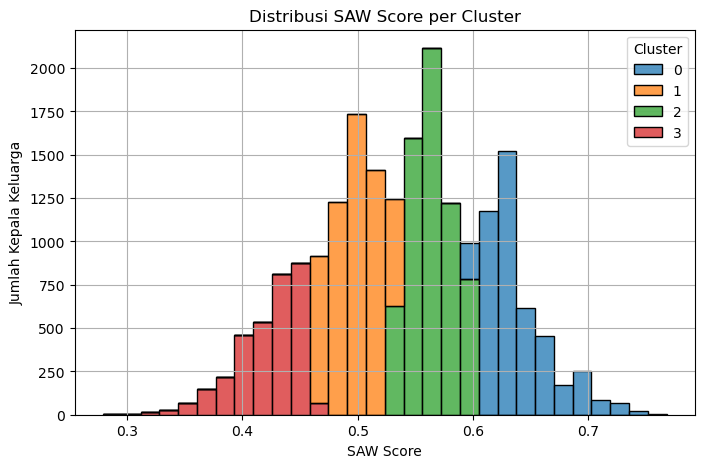

In [129]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data3, x='SAW_Score', hue='Cluster', multiple='stack', palette='tab10', bins=30)
plt.title('Distribusi SAW Score per Cluster')
plt.xlabel('SAW Score')
plt.ylabel('Jumlah Kepala Keluarga')
plt.grid(True)
plt.show()

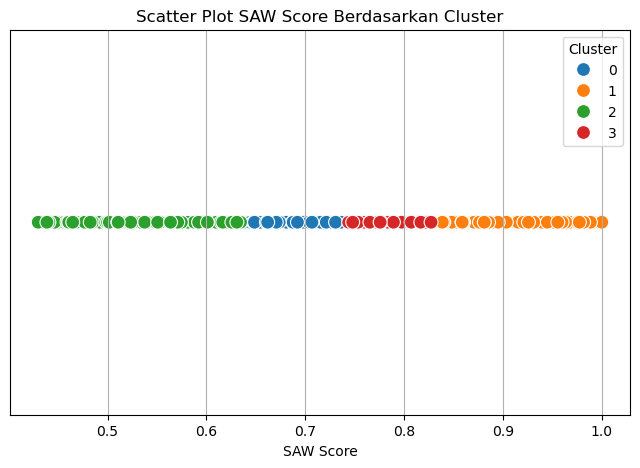

In [248]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data3, x='SAW_Score', y=[0]*len(data3), hue='Cluster', palette='tab10', s=100)

plt.title('Scatter Plot SAW Score Berdasarkan Cluster')
plt.xlabel('SAW Score')
plt.yticks([])  # karena y hanya dummy (0)
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [257]:
data3

,KepalaKeluarga,Kecamatan,DesaKelurahan,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan,SAW_Score,Cluster
0,ABDUL MANAN,SAMPUNG,CARANGREJO,2,2,2,1,3,1,2,2,1,1,2,2,2,4,0.606992,2
1,TRIMO,PONOROGO,PAJU,1,2,2,1,3,1,2,2,1,1,2,5,2,5,0.695247,0
2,RAMELAN,NGEBEL,TALUN,2,2,2,1,3,1,1,2,3,1,2,5,2,5,0.602947,2
3,BIBIT,NGEBEL,TALUN,1,2,2,1,3,1,2,2,3,1,2,5,2,5,0.667647,0
4,KATIJO,NGRAYUN,GEDANGAN,2,1,2,1,3,1,2,2,1,3,2,2,2,4,0.657358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TUMIRIN,SUKOREJO,PRAJEGAN,3,1,1,1,1,1,1,1,1,1,1,1,1,4,0.858858,1
95658,NALIM,JENANGAN,SRATEN,3,1,1,1,1,1,2,1,1,1,1,2,1,3,0.817000,3
95659,SANIRAN,SAMBIT,BESUKI,3,1,1,1,1,1,2,1,1,1,1,1,1,4,0.827358,3
95660,SOEKAR,KAUMAN,SOMOROTO,3,1,1,1,1,1,1,1,1,1,1,1,1,4,0.858858,1


In [259]:
data3.to_excel('data_proses2.xlsx', index=False, engine='openpyxl')
print("Data berhasil disimpan")

Data berhasil disimpan


In [85]:
cluster_summary = data3.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan,SAW_Score
Cluster,,,,,,,,,,,,,,,
0,2.174532,1.304445,1.287283,1.062639,1.894285,1.214862,1.925348,10.476231,1.094560,1.250558,1.143642,1.850523,1.728505,3.588467,0.563755
1,1.265474,1.215109,1.988468,1.213697,2.785832,1.461520,0.803483,6.877854,1.594728,1.658979,1.389503,3.325488,0.851024,3.998823,0.372935
2,1.753584,1.429181,1.793686,1.106143,2.405973,1.379693,1.300341,8.088225,1.265870,1.394539,1.323720,2.655802,1.197099,3.815700,0.471367
3,2.773376,1.335384,1.043799,1.024114,1.295276,1.124508,2.241880,11.881644,1.029528,1.082677,1.083415,1.442421,2.037648,3.317421,0.653247


In [164]:
cluster_mode = data3.groupby('Cluster').agg(lambda x: x.mode().iloc[0])
cluster_mode

,KepalaKeluarga,Kecamatan,DesaKelurahan,FrekuensiMakanPerHari,BisaBerobatKePuskesmas,Pendapatan,SumberPenerangan,BahanBakarMemasak,MemilikifasilitasBuangAirBesar,FrekuensiMakanDagingSusuAyam,LuasLantai,JenisDinding,SumberAirMinum,MemilikiSimpanan,JenisLantai,FrekuensiBeliPakaianBaru,Pendidikan,SAW_Score
Cluster,,,,,,,,,,,,,,,,,,
0,SLAMET,NGRAYUN,SIDOHARJO,2,1,2,1,3,1,1,2,1,1,1,2,1,4,0.509498
1,SLAMET,NGRAYUN,SIDOHARJO,1,1,2,1,3,1,1,2,1,1,1,5,1,4,0.377095
2,SLAMET,BABADAN,BANGUNREJO,3,1,1,1,1,1,2,1,1,1,1,1,2,4,0.638165
3,SLAMET,SAWOO,TEMON,2,1,1,1,1,1,2,1,1,1,1,1,1,4,0.582032


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Misalnya variabelmu disimpan di df
# cluster_profile = df.groupby('cluster')[['Pendidikan', 'Kesehatan', 'Pendapatan', 'Akses_Pelayanan']].mean()
# print(cluster_profile)


# sns.heatmap(cluster_profile, annot=True, cmap="YlOrRd")
# plt.title("Profil Rata-rata Skor Variabel Tiap Cluster")
# plt.show()


In [166]:
variables = ['Pendidikan', 'JenisLantai', 'JenisDinding', 'SumberAirMinum',
             'MemilikiSimpanan', 'Pendapatan', 'FrekuensiMakanPerHari',
             'BisaBerobatKePuskesmas', 'BahanBakarMemasak',
             'MemilikifasilitasBuangAirBesar', 'FrekuensiMakanDagingSusuAyam']

for var in variables:
    print(f"\n### Proporsi {var} per Cluster")
    display(pd.crosstab(data3['Cluster'], data3[var], normalize='index') * 100)



### Proporsi Pendidikan per Cluster


Pendidikan,1,2,3,4,5
Cluster,,,,,
0,0.288739,8.389477,20.147578,51.860764,19.313442
1,0.073493,4.801568,17.515924,52.719255,24.889760
2,1.947705,23.639274,24.252935,39.754536,10.405550
3,0.960243,16.307278,21.310647,46.647574,14.774259



### Proporsi JenisLantai per Cluster


JenisLantai,1,2,3,4,5
Cluster,,,,,
0,28.216234,41.722810,2.245749,0.096246,27.718961
1,15.605096,35.350318,2.180304,0.195982,46.668300
2,65.314835,29.082177,0.640342,0.000000,4.962647
3,49.292453,36.253369,1.701482,0.033693,12.719003



### Proporsi JenisDinding per Cluster


JenisDinding,1,2,3,4
Cluster,,,,
0,88.498556,1.604107,5.518126,4.379211
1,74.889760,2.204802,11.856933,11.048506
2,98.425827,0.293490,0.880470,0.400213
3,95.097709,0.825472,2.678571,1.398248



### Proporsi SumberAirMinum per Cluster


SumberAirMinum,1,2,3,4
Cluster,,,,
0,77.718961,4.860443,17.404556,0.016041
1,64.110730,6.491916,29.348359,0.048996
2,94.743863,1.494130,3.762006,0.000000
3,86.590296,2.779650,10.630054,0.000000



### Proporsi MemilikiSimpanan per Cluster


MemilikiSimpanan,1,2
Cluster,,
0,69.955085,30.044915
1,64.527193,35.472807
2,89.087513,10.912487
3,83.187332,16.812668



### Proporsi Pendapatan per Cluster


Pendapatan,1,2
Cluster,,
0,28.168110,71.831890
1,3.846154,96.153846
2,90.715048,9.284952
3,67.115903,32.884097



### Proporsi FrekuensiMakanPerHari per Cluster


FrekuensiMakanPerHari,1,2,3
Cluster,,,
0,38.675008,52.021174,9.303818
1,75.404214,24.203822,0.391965
2,0.586980,17.315902,82.097118
3,8.170485,59.518194,32.311321



### Proporsi BisaBerobatKePuskesmas per Cluster


BisaBerobatKePuskesmas,1,2
Cluster,,
0,61.629772,38.370228
1,82.043116,17.956884
2,60.458911,39.541089
3,66.997978,33.002022



### Proporsi BahanBakarMemasak per Cluster


BahanBakarMemasak,1,2,3
Cluster,,,
0,29.531601,1.090792,69.377607
1,10.852523,0.538951,88.608525
2,85.672359,0.586980,13.740662
3,55.626685,0.943396,43.429919



### Proporsi MemilikifasilitasBuangAirBesar per Cluster


MemilikifasilitasBuangAirBesar,1,2,3
Cluster,,,
0,73.339750,17.548925,9.111325
1,64.968153,25.894170,9.137678
2,89.834578,5.442903,4.722519
3,83.456873,10.293127,6.250000



### Proporsi FrekuensiMakanDagingSusuAyam per Cluster


FrekuensiMakanDagingSusuAyam,0,1,2,3
Cluster,,,,
0,16.923324,39.220404,33.301251,10.555021
1,39.416952,40.396864,17.540421,2.645762
2,0.773746,19.770544,40.715048,38.740662
3,5.542453,28.402965,37.230458,28.824124


Simpan Model K-Means

In [195]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

import joblib

kmeans = joblib.load('kmeans_model.pkl')
print("Jumlah cluster:", kmeans.n_clusters)


data3.to_excel('data_segmen_kemiskinan.xlsx', index=False, engine='openpyxl')

print("Data berhasil disimpan ke 'data_keluarga_tertransformasi.xlsx'")
